In [154]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV, KFold
from sklearn.metrics import precision_score, accuracy_score, recall_score, confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, auc
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import DecisionTreeAttack


# **Loading the dataset**

In [53]:
csv = pd.read_csv('/content/heloc_dataset.csv')
df= pd.DataFrame(csv)

# **Description of the dataset**

In [54]:
df.shape

(10459, 24)

In [55]:
df.columns

Index(['RiskPerformance', 'ExternalRiskEstimate', 'MSinceOldestTradeOpen',
       'MSinceMostRecentTradeOpen', 'AverageMInFile', 'NumSatisfactoryTrades',
       'NumTrades60Ever2DerogPubRec', 'NumTrades90Ever2DerogPubRec',
       'PercentTradesNeverDelq', 'MSinceMostRecentDelq',
       'MaxDelq2PublicRecLast12M', 'MaxDelqEver', 'NumTotalTrades',
       'NumTradesOpeninLast12M', 'PercentInstallTrades',
       'MSinceMostRecentInqexcl7days', 'NumInqLast6M', 'NumInqLast6Mexcl7days',
       'NetFractionRevolvingBurden', 'NetFractionInstallBurden',
       'NumRevolvingTradesWBalance', 'NumInstallTradesWBalance',
       'NumBank2NatlTradesWHighUtilization', 'PercentTradesWBalance'],
      dtype='object')

In [56]:
df.describe()

ExternalRiskEstimate  MSinceOldestTradeOpen  MSinceMostRecentTradeOpen  \
count          10459.000000           10459.000000               10459.000000   
mean              67.425758             184.205373                   8.543455   
std               21.121621             109.683816                  13.301745   
min               -9.000000              -9.000000                  -9.000000   
25%               63.000000             118.000000                   3.000000   
50%               71.000000             178.000000                   5.000000   
75%               79.000000             249.500000                  11.000000   
max               94.000000             803.000000                 383.000000   

       AverageMInFile  NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
count    10459.000000           10459.000000                 10459.000000   
mean        73.843293              19.428052                     0.042738   
std         38.782803              13.004327                     2.513910   
min         -9.000000              -9.000000                    -9.000000   
25%         52.000000              12.000000                     0.000000   
50%         74.000000              19.000000                     0.000000   
75%         95.000000              27.000000                     1.000000   
max        383.000000              79.000000                    19.000000   

       NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  \
count                 10459.000000            10459.000000   
mean                     -0.142843               86.661536   
std                       2.367397               25.999584   
min                      -9.000000               -9.000000   
25%                       0.000000               87.000000   
50%                       0.000000               96.000000   
75%                       0.000000              100.000000   
max                      19.000000              100.000000   

       MSinceMostRecentDelq  MaxDelq2PublicRecLast12M  ...  \
count          10459.000000              10459.000000  ...   
mean               6.762406                  4.928291  ...   
std               20.501250                  3.756275  ...   
min               -9.000000                 -9.000000  ...   
25%               -7.000000                  4.000000  ...   
50%               -7.000000                  6.000000  ...   
75%               14.000000                  7.000000  ...   
max               83.000000                  9.000000  ...   

       PercentInstallTrades  MSinceMostRecentInqexcl7days  NumInqLast6M  \
count          10459.000000                  10459.000000  10459.000000   
mean              32.166460                     -0.325366      0.868152   
std               20.128634                      6.067556      3.179304   
min               -9.000000                     -9.000000     -9.000000   
25%               20.000000                     -7.000000      0.000000   
50%               31.000000                      0.000000      1.000000   
75%               44.000000                      1.000000      2.000000   
max              100.000000                     24.000000     66.000000   

       NumInqLast6Mexcl7days  NetFractionRevolvingBurden  \
count           10459.000000                10459.000000   
mean                0.812602                   31.629888   
std                 3.143698                   30.060140   
min                -9.000000                   -9.000000   
25%                 0.000000                    5.000000   
50%                 1.000000                   25.000000   
75%                 2.000000                   54.000000   
max                66.000000                  232.000000   

       NetFractionInstallBurden  NumRevolvingTradesWBalance  \
count              10459.000000                10459.000000   
mean                  39.158906                    3.185008   
std                   42.101601                    4.413173

In [57]:
df.head()

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad                    55                    144   
1             Bad                    61                     58   
2             Bad                    67                     66   
3             Bad                    66                    169   
4             Bad                    81                    333   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                          4              84                     20   
1                         15              41                      2   
2                          5              24                      9   
3                          1              73                     28   
4                         27             132                     12   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                            3                            0   
1                            4                            4   
2                            0                            0   
3                            1                            1   
4                            0                            0   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  PercentInstallTrades  \
0                      83                     2  ...                    43   
1                     100                    -7  ...                    67   
2                     100                    -7  ...                    44   
3                      93                    76  ...                    57   
4                     100                    -7  ...                    25   

   MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                             0             0                      0   
1                             0             0                      0   
2                             0             4                      4   
3                             0             5                      4   
4                             0             1                      1   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                          33                        -8   
1                           0                        -8   
2                          53                        66   
3                          72                        83   
4                          51                        89   

   NumRevolvingTradesWBalance  NumInstallTradesWBalance  \
0                           8                         1   
1                           0                        -8   
2                           4                         2   
3                           6                         4   
4                           3                         1   

   NumBank2NatlTradesWHighUtilization  PercentTradesWBalance  
0                                   1                     69  
1                                  -8                      0  
2                                   1                     86  
3                                   3                     91  
4                                   0                     80  

[5 rows x 24 columns]

In [58]:
df.isnull().sum()

RiskPerformance                       0
ExternalRiskEstimate                  0
MSinceOldestTradeOpen                 0
MSinceMostRecentTradeOpen             0
AverageMInFile                        0
NumSatisfactoryTrades                 0
NumTrades60Ever2DerogPubRec           0
NumTrades90Ever2DerogPubRec           0
PercentTradesNeverDelq                0
MSinceMostRecentDelq                  0
MaxDelq2PublicRecLast12M              0
MaxDelqEver                           0
NumTotalTrades                        0
NumTradesOpeninLast12M                0
PercentInstallTrades                  0
MSinceMostRecentInqexcl7days          0
NumInqLast6M                          0
NumInqLast6Mexcl7days                 0
NetFractionRevolvingBurden            0
NetFractionInstallBurden              0
NumRevolvingTradesWBalance            0
NumInstallTradesWBalance              0
NumBank2NatlTradesWHighUtilization    0
PercentTradesWBalance                 0
dtype: int64

In [59]:
df.duplicated().sum()

587

In [60]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [61]:
print(df.shape)

(9872, 24)


# **Vizualisation**

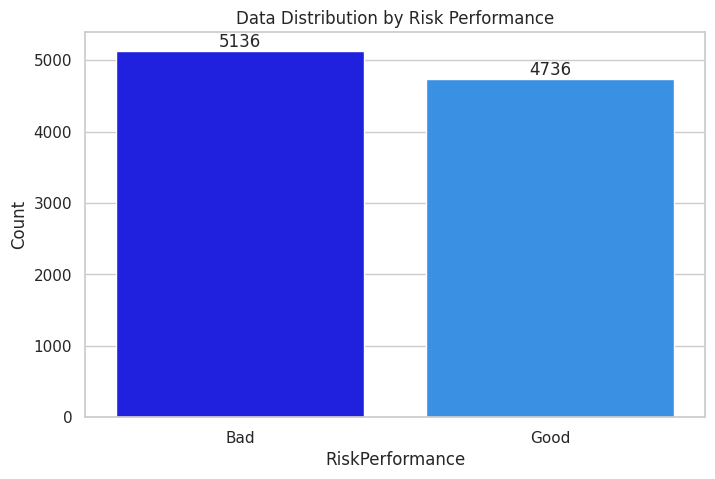

In [160]:
# Data distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='RiskPerformance', hue='RiskPerformance', palette=["blue", "dodgerblue"])  # Adjusted to 2 colors

# Add counts on top of the bars
for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=12)

plt.ylabel('Count')
plt.title('Data Distribution by Risk Performance')
plt.show()


Note: we can say that the data distribution in this study is well-balanced, Class 'Bad' accounts for 52% of the data and Class 'Good' for 48%.
This balance is important as it ensures the reliability of our model's predictions, reducing the risk of overfitting and ensuring robust performance across all classes

In [140]:
columns_to_exclude = ['RiskPerformance']
columns_to_normalize = df.columns.difference(columns_to_exclude)

# Normalizing with the MinMaxScaler
scaler = MinMaxScaler()
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])


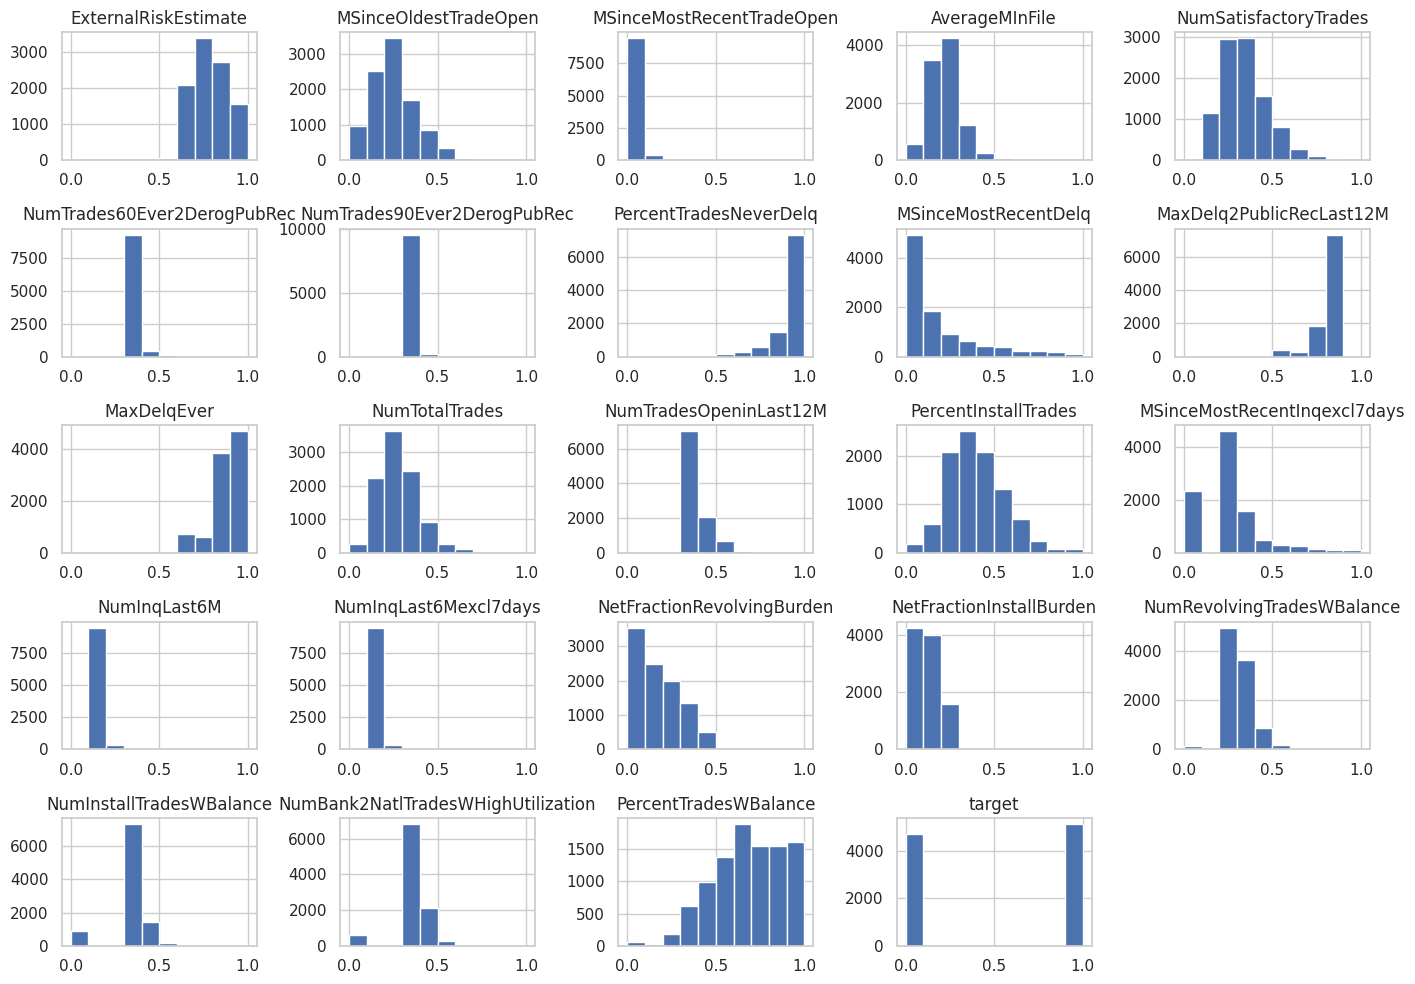

In [141]:
# Histogram for the repartition of each column
df.hist(figsize=(14, 10))
plt.tight_layout()
plt.show()

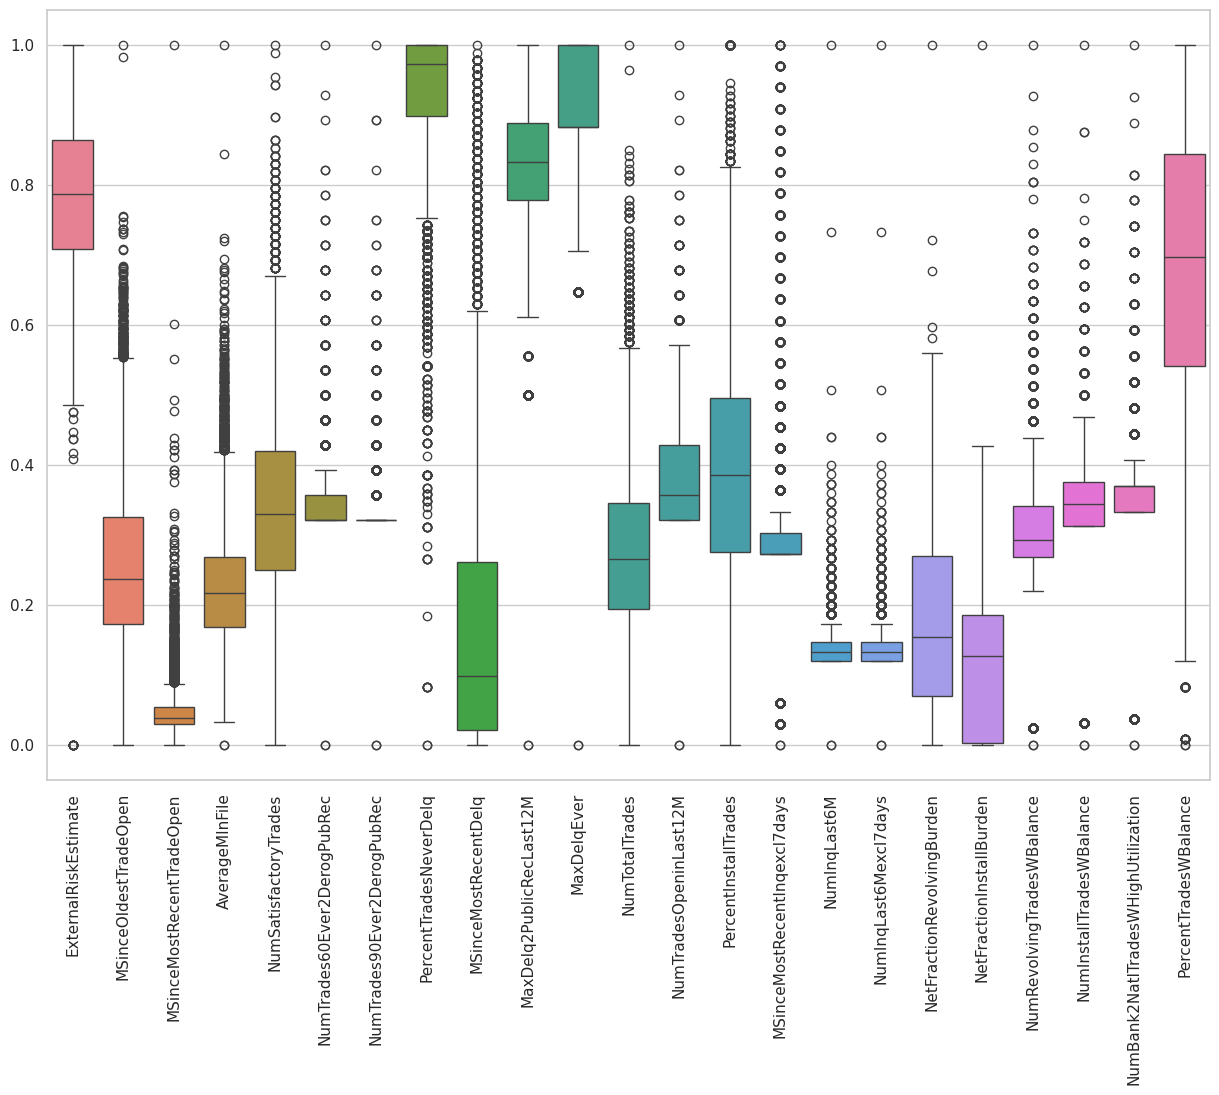

In [65]:
# Box plot
plt.figure(figsize=(15, 10))
sns.boxplot(data=df)
plt.xticks(rotation=90)
plt.show()

# **Binary encoding for the RiskPerformance**

In [66]:
df['target'] = df['RiskPerformance'].map({'Good': 0, 'Bad': 1})

In [67]:
print(df[['RiskPerformance', 'target']].head())

  RiskPerformance  target
0             Bad       1
1             Bad       1
2             Bad       1
3             Bad       1
4             Bad       1


In [68]:
df.head(10)

RiskPerformance  ExternalRiskEstimate  MSinceOldestTradeOpen  \
0             Bad              0.621359               0.188424   
1             Bad              0.679612               0.082512   
2             Bad              0.737864               0.092365   
3             Bad              0.728155               0.219212   
4             Bad              0.873786               0.421182   
5             Bad              0.660194               0.179803   
6            Good              0.611650               0.119458   
7            Good              0.747573               0.193350   
8             Bad              0.660194               0.410099   
9             Bad              0.679612               0.108374   

   MSinceMostRecentTradeOpen  AverageMInFile  NumSatisfactoryTrades  \
0                   0.033163        0.237245               0.329545   
1                   0.061224        0.127551               0.125000   
2                   0.035714        0.084184               0.204545   
3                   0.025510        0.209184               0.420455   
4                   0.091837        0.359694               0.238636   
5                   0.051020        0.221939               0.454545   
6                   0.040816        0.117347               0.386364   
7                   0.040816        0.188776               0.295455   
8                   0.028061        0.375000               0.375000   
9                   0.033163        0.114796               0.318182   

   NumTrades60Ever2DerogPubRec  NumTrades90Ever2DerogPubRec  \
0                     0.428571                     0.321429   
1                     0.464286                     0.464286   
2                     0.321429                     0.321429   
3                     0.357143                     0.357143   
4                     0.321429                     0.321429   
5                     0.321429                     0.321429   
6                     0.321429                     0.321429   
7                     0.321429                     0.321429   
8                     0.321429                     0.321429   
9                     0.321429                     0.321429   

   PercentTradesNeverDelq  MSinceMostRecentDelq  ...  \
0                0.844037              0.119565  ...   
1                1.000000              0.021739  ...   
2                1.000000              0.021739  ...   
3                0.935780              0.923913  ...   
4                1.000000              0.021739  ...   
5                0.917431              0.108696  ...   
6                0.926606              0.195652  ...   
7                0.844037              0.434783  ...   
8                0.862385              0.152174  ...   
9                0.954128              0.152174  ...   

   MSinceMostRecentInqexcl7days  NumInqLast6M  NumInqLast6Mexcl7days  \
0                      0.272727      0.120000               0.120000   
1                      0.272727      0.120000               0.120000   
2                      0.272727      0.173333               0.173333   
3                      0.272727      0.186667               0.173333   
4                      0.272727      0.133333               0.133333   
5                      0.272727      0.120000               0.120000   
6                      0.272727      0.173333               0.173333   
7                      0.272727      0.120000               0.120000   
8                      0.272727      0.133333               0.133333   
9                      0.272727      0.200000               0.200000   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                    0.174274                  0.002083   
1                    0.037344                  0.002083   
2                    0.257261                  0.156250   
3                    0.336100                  0.191667   
4                    0.248963                  0.204167   
5                    0.294606      

In [69]:
# Count the number of "Bad" and "Good" entries in the 'target' column
print(df['target'].value_counts())


target
1    5136
0    4736
Name: count, dtype: int64


# **Dropping the less correlated features**

In [70]:
df_dropped = df.drop(columns=['RiskPerformance']).copy()

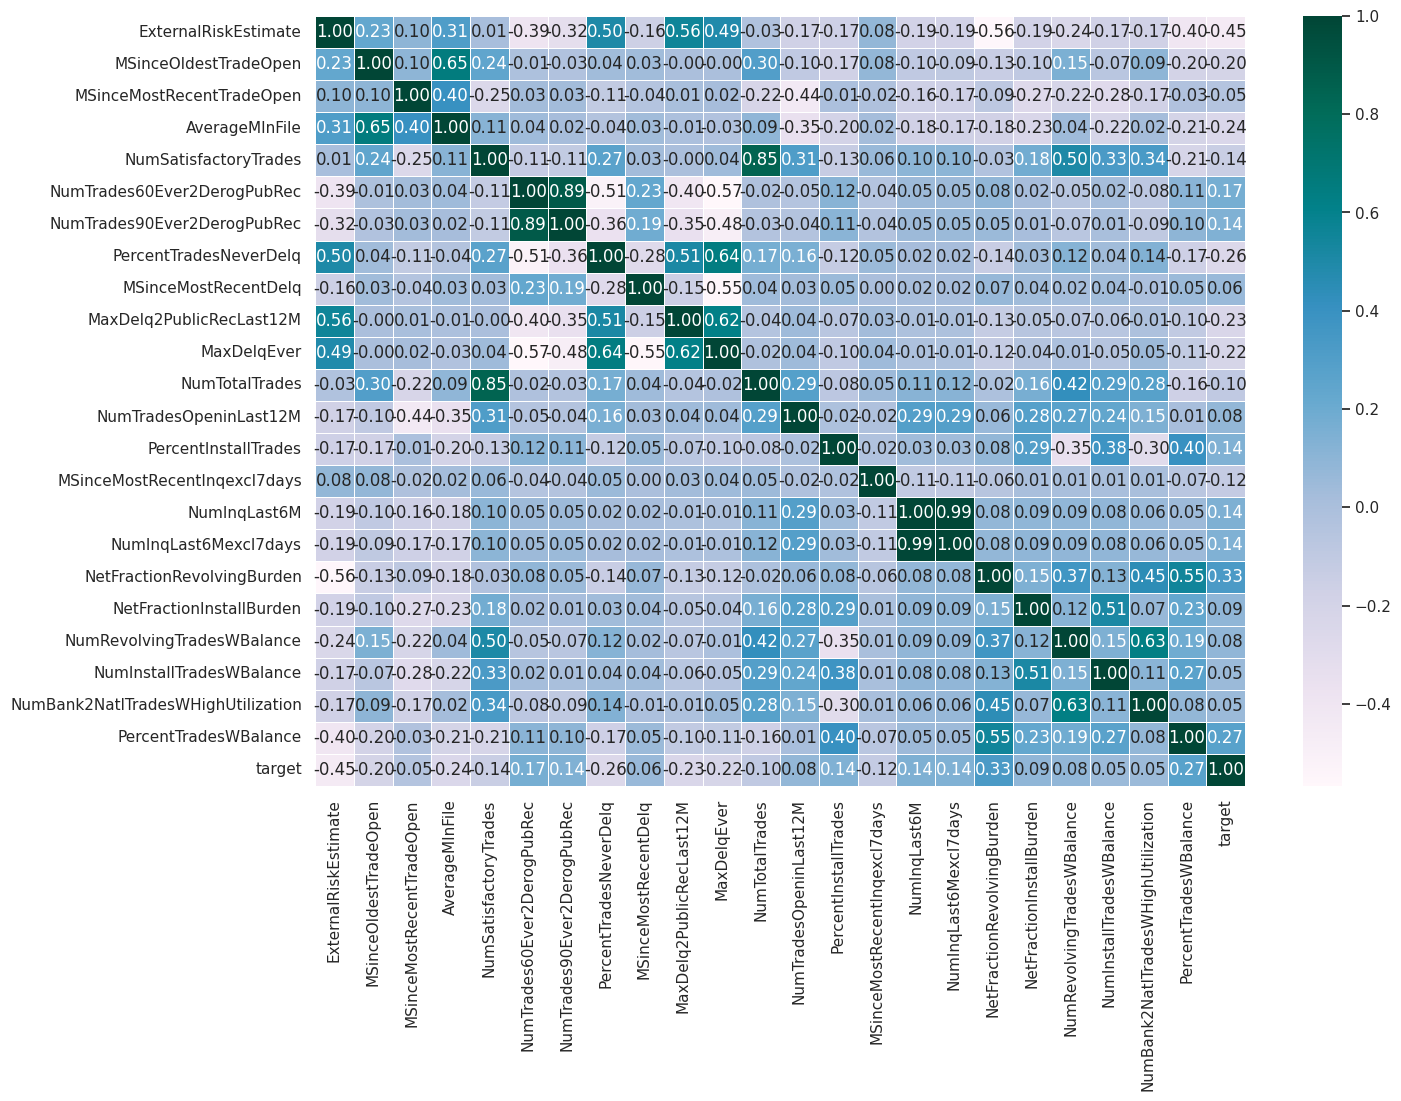

In [71]:
# Visualizing the correlation matrix
corr_matrix = df_dropped.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 xticklabels = True,
                 yticklabels = True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="PuBuGn")

In [72]:
df_dropped.corr()['target']

ExternalRiskEstimate                 -0.446714
MSinceOldestTradeOpen                -0.204447
MSinceMostRecentTradeOpen            -0.046384
AverageMInFile                       -0.243821
NumSatisfactoryTrades                -0.140919
NumTrades60Ever2DerogPubRec           0.168682
NumTrades90Ever2DerogPubRec           0.139297
PercentTradesNeverDelq               -0.255179
MSinceMostRecentDelq                  0.062453
MaxDelq2PublicRecLast12M             -0.234675
MaxDelqEver                          -0.215116
NumTotalTrades                       -0.100674
NumTradesOpeninLast12M                0.077334
PercentInstallTrades                  0.140168
MSinceMostRecentInqexcl7days         -0.115907
NumInqLast6M                          0.143220
NumInqLast6Mexcl7days                 0.137578
NetFractionRevolvingBurden            0.329841
NetFractionInstallBurden              0.093771
NumRevolvingTradesWBalance            0.082309
NumInstallTradesWBalance              0.054400
NumBank2NatlTradesWHighUtilization    0.051570
PercentTradesWBalance                 0.272699
target                                1.000000
Name: target, dtype: float64

The closer it is to 0, the less correlated it is with the target feature.

MSinceMostRecentTradeOpen	-0.046384

NumInstallTradesWBalance	0.054400

NumBank2NatlTradesWHighUtilization	0.051570

In [73]:
# Droping the less correlated features
df_dropped2 = df_dropped.copy()
df_dropped2.drop(columns=['MSinceMostRecentTradeOpen', 'NumInstallTradesWBalance', "NumBank2NatlTradesWHighUtilization" ], inplace=True)

In [74]:
df_dropped2.head()

ExternalRiskEstimate  MSinceOldestTradeOpen  AverageMInFile  \
0              0.621359               0.188424        0.237245   
1              0.679612               0.082512        0.127551   
2              0.737864               0.092365        0.084184   
3              0.728155               0.219212        0.209184   
4              0.873786               0.421182        0.359694   

   NumSatisfactoryTrades  NumTrades60Ever2DerogPubRec  \
0               0.329545                     0.428571   
1               0.125000                     0.464286   
2               0.204545                     0.321429   
3               0.420455                     0.357143   
4               0.238636                     0.321429   

   NumTrades90Ever2DerogPubRec  PercentTradesNeverDelq  MSinceMostRecentDelq  \
0                     0.321429                0.844037              0.119565   
1                     0.464286                1.000000              0.021739   
2                     0.321429                1.000000              0.021739   
3                     0.357143                0.935780              0.923913   
4                     0.321429                1.000000              0.021739   

   MaxDelq2PublicRecLast12M  MaxDelqEver  ...  NumTradesOpeninLast12M  \
0                  0.666667     0.823529  ...                0.357143   
1                  0.500000     1.000000  ...                0.321429   
2                  0.888889     1.000000  ...                0.464286   
3                  0.833333     0.882353  ...                0.428571   
4                  0.888889     1.000000  ...                0.321429   

   PercentInstallTrades  MSinceMostRecentInqexcl7days  NumInqLast6M  \
0              0.477064                      0.272727      0.120000   
1              0.697248                      0.272727      0.120000   
2              0.486239                      0.272727      0.173333   
3              0.605505                      0.272727      0.186667   
4              0.311927                      0.272727      0.133333   

   NumInqLast6Mexcl7days  NetFractionRevolvingBurden  \
0               0.120000                    0.174274   
1               0.120000                    0.037344   
2               0.173333                    0.257261   
3               0.173333                    0.336100   
4               0.133333                    0.248963   

   NetFractionInstallBurden  NumRevolvingTradesWBalance  \
0                  0.002083                    0.414634   
1                  0.002083                    0.219512   
2                  0.156250                    0.317073   
3                  0.191667                    0.365854   
4                  0.204167                    0.292683   

   PercentTradesWBalance  target  
0               0.715596       1  
1               0.082569       1  
2               0.871560       1  
3               0.917431       1  
4               0.816514       1  

[5 rows x 21 columns]

In [75]:
df_dropped2.shape

(9872, 21)

# **Forward Feature construction**

In [76]:
data = df_dropped2
X = data.drop(columns=['target'])
y = data['target']

In [77]:
# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [78]:
selected_features = []
best_performance = 0

while len(selected_features) < len(X.columns):
    # Initializing variables to keep track of the best feature to add
    best_feature = None
    best_accuracy = 0

    # Iterating over features that are not selected yet
    for feature in X.columns:
        if feature not in selected_features:
            # Adding the feature to the selected features
            features_to_use = selected_features + [feature]
            # Training a model using only the selected features
            model = RandomForestClassifier(random_state=42)
            model.fit(X_train[features_to_use], y_train)

            # Evaluating the model's performance on the validation set
            y_pred = model.predict(X_test[features_to_use])
            accuracy = accuracy_score(y_test, y_pred)

            # Checking if adding this feature improves performance
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                best_feature = feature

    # Add the best feature to the selected features
    selected_features.append(best_feature)
    print(f"Selected feature: {best_feature}, Accuracy: {best_accuracy}")

    # Update best performance if necessary
    if best_accuracy > best_performance:
        best_performance = best_accuracy
        best_selected_features = selected_features.copy()




Selected feature: ExternalRiskEstimate, Accuracy: 0.710379746835443
Selected feature: NumTradesOpeninLast12M, Accuracy: 0.710379746835443
Selected feature: MaxDelq2PublicRecLast12M, Accuracy: 0.6972151898734177
Selected feature: NumTrades90Ever2DerogPubRec, Accuracy: 0.6951898734177215
Selected feature: NumTrades60Ever2DerogPubRec, Accuracy: 0.6845569620253165
Selected feature: AverageMInFile, Accuracy: 0.6830379746835443
Selected feature: MSinceMostRecentInqexcl7days, Accuracy: 0.710379746835443
Selected feature: NumTotalTrades, Accuracy: 0.7316455696202532
Selected feature: MSinceMostRecentDelq, Accuracy: 0.7372151898734177
Selected feature: PercentTradesNeverDelq, Accuracy: 0.7331645569620253
Selected feature: NumInqLast6Mexcl7days, Accuracy: 0.7336708860759493
Selected feature: NumInqLast6M, Accuracy: 0.7362025316455696
Selected feature: NetFractionRevolvingBurden, Accuracy: 0.7351898734177216
Selected feature: NetFractionInstallBurden, Accuracy: 0.7382278481012658
Selected feature

In [79]:
print("Best selected features:", best_selected_features)
print("Best performance:", best_performance)

Best selected features: ['ExternalRiskEstimate', 'NumTradesOpeninLast12M', 'MaxDelq2PublicRecLast12M', 'NumTrades90Ever2DerogPubRec', 'NumTrades60Ever2DerogPubRec', 'AverageMInFile', 'MSinceMostRecentInqexcl7days', 'NumTotalTrades', 'MSinceMostRecentDelq', 'PercentTradesNeverDelq', 'NumInqLast6Mexcl7days', 'NumInqLast6M', 'NetFractionRevolvingBurden', 'NetFractionInstallBurden', 'NumRevolvingTradesWBalance']
Best performance: 0.7422784810126583


In [80]:
# Choosing only the best selected features
df_ffc = data[best_selected_features + ['target']]
df_ffc.head()

ExternalRiskEstimate  NumTradesOpeninLast12M  MaxDelq2PublicRecLast12M  \
0              0.621359                0.357143                  0.666667   
1              0.679612                0.321429                  0.500000   
2              0.737864                0.464286                  0.888889   
3              0.728155                0.428571                  0.833333   
4              0.873786                0.321429                  0.888889   

   NumTrades90Ever2DerogPubRec  NumTrades60Ever2DerogPubRec  AverageMInFile  \
0                     0.321429                     0.428571        0.237245   
1                     0.464286                     0.464286        0.127551   
2                     0.321429                     0.321429        0.084184   
3                     0.357143                     0.357143        0.209184   
4                     0.321429                     0.321429        0.359694   

   MSinceMostRecentInqexcl7days  NumTotalTrades  MSinceMostRecentDelq  \
0                      0.272727        0.283186              0.119565   
1                      0.272727        0.141593              0.021739   
2                      0.272727        0.159292              0.021739   
3                      0.272727        0.345133              0.923913   
4                      0.272727        0.185841              0.021739   

   PercentTradesNeverDelq  NumInqLast6Mexcl7days  NumInqLast6M  \
0                0.844037               0.120000      0.120000   
1                1.000000               0.120000      0.120000   
2                1.000000               0.173333      0.173333   
3                0.935780               0.173333      0.186667   
4                1.000000               0.133333      0.133333   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                    0.174274                  0.002083   
1                    0.037344                  0.002083   
2                    0.257261                  0.156250   
3                    0.336100                  0.191667   
4                    0.248963                  0.204167   

   NumRevolvingTradesWBalance  target  
0                    0.414634       1  
1                    0.219512       1  
2                    0.317073       1  
3                    0.365854       1  
4                    0.292683       1

In [81]:
df_ffc.shape

(9872, 16)

In [82]:
df_ffc.columns

Index(['ExternalRiskEstimate', 'NumTradesOpeninLast12M',
       'MaxDelq2PublicRecLast12M', 'NumTrades90Ever2DerogPubRec',
       'NumTrades60Ever2DerogPubRec', 'AverageMInFile',
       'MSinceMostRecentInqexcl7days', 'NumTotalTrades',
       'MSinceMostRecentDelq', 'PercentTradesNeverDelq',
       'NumInqLast6Mexcl7days', 'NumInqLast6M', 'NetFractionRevolvingBurden',
       'NetFractionInstallBurden', 'NumRevolvingTradesWBalance', 'target'],
      dtype='object')

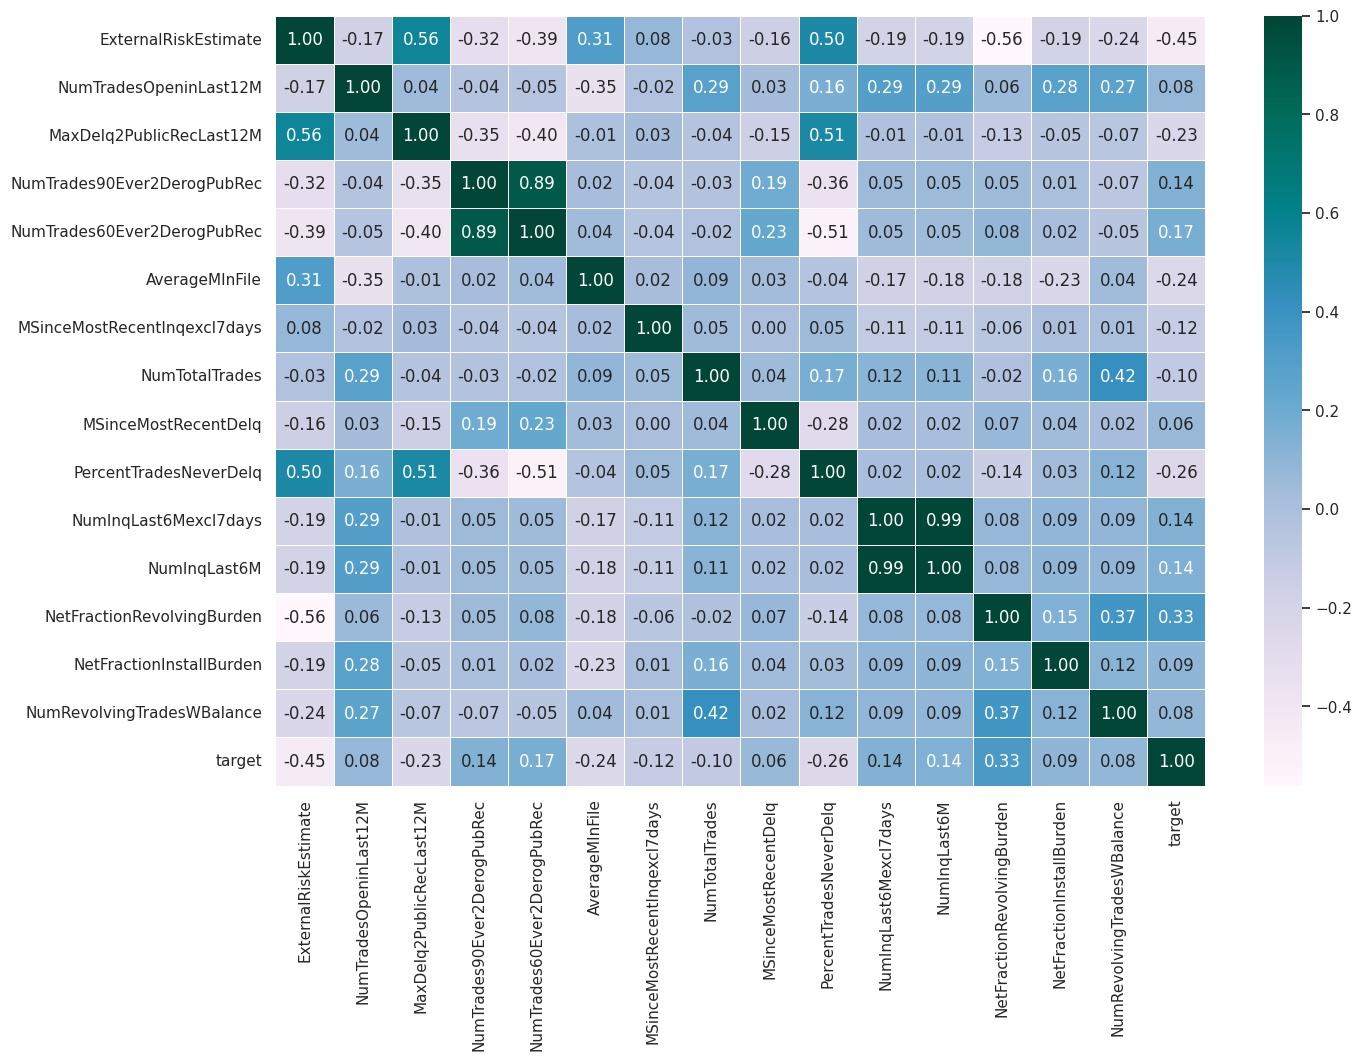

In [83]:
# Visualizing the correlation matrix
corr_matrix = df_ffc.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix,
                 annot = True,
                 xticklabels = True,
                 yticklabels = True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="PuBuGn")

# **Outliers**

In [84]:
from scipy.stats import zscore

In [142]:
numeric_cols = df_ffc.select_dtypes(include=np.number).columns.tolist()
z_scores = df_ffc[numeric_cols].apply(zscore)
# calculating z_score to measure how many standard deviations an observation is from the mean
threshold = 3
#Any observations with a z_score above 3 or below -3 are typically considered outliers
outliers = (np.abs(z_scores) > threshold).any(axis=1)
clean_df = df_ffc[~outliers]

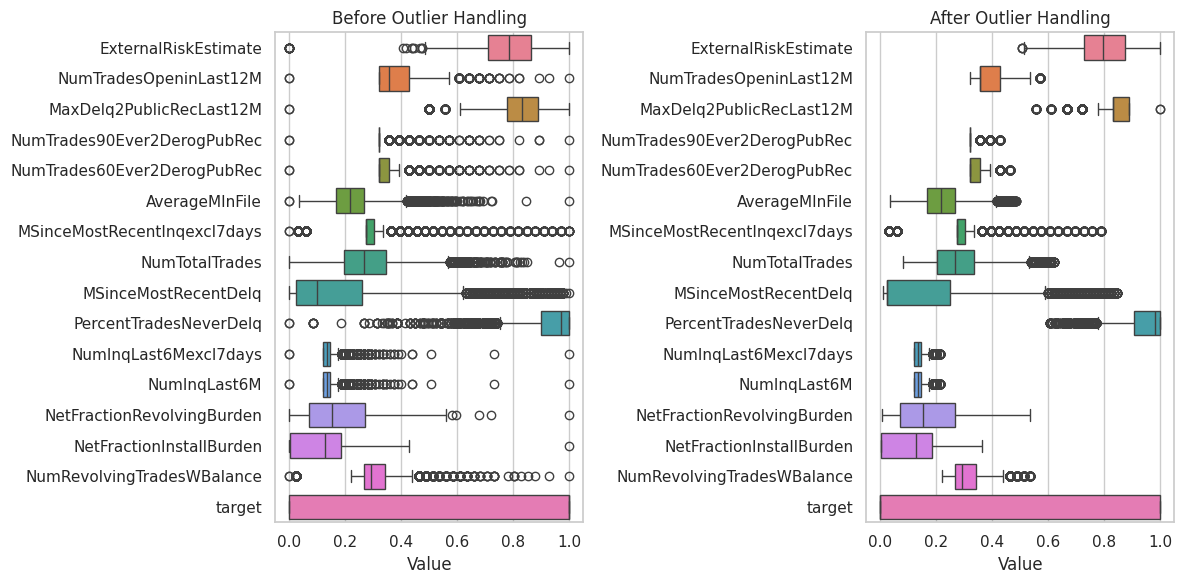

In [143]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

# Plot before outlier handling
plt.subplot(1, 2, 1)
sns.boxplot(data=df_ffc[numeric_cols], orient="h")
plt.title("Before Outlier Handling")
plt.xlabel("Value")

# Plot after outlier handling
plt.subplot(1, 2, 2)
sns.boxplot(data=clean_df[numeric_cols], orient="h")
plt.title("After Outlier Handling")
plt.xlabel("Value")

plt.tight_layout()
plt.show()


In [144]:
clean_df.shape

(8162, 16)

# **Random Forest**

In [88]:
X = clean_df.drop(['target'], axis=1)
y = clean_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [145]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

In [90]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [91]:
# Predict probabilities on the test set
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Calculate the AUC-ROC score
auc_rf = roc_auc_score(y_test, y_probs_rf)
print(f'Random Forest AUC-ROC: {auc_rf:.4f}')


Random Forest AUC-ROC: 0.7909


# **Cross validation and hyperparameters tuning**

In [92]:
# Performing cross-validation
cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='roc_auc')  # 5-folds for cv

print(f'Mean AUC score: {cv_scores.mean():.4f}')

Mean AUC score: 0.7883


In [103]:
from sklearn.model_selection import GridSearchCV

# Defining the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# GridSearchCV for fine-tuning the hyperparameters
grid_search = GridSearchCV(rf_model, param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

# Best hyperparameters
print(f'Best parameters: {grid_search.best_params_}')


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


Best parameters: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}


In [104]:
# Training the Random Forest model with the best hyperparameters
rf_optimized = RandomForestClassifier(max_depth=10, min_samples_split=10, n_estimators=300, random_state=0)
rf_optimized.fit(X_train, y_train)

# Predict probabilities on the test set
y_probs_rf_optimized = rf_optimized.predict_proba(X_test)[:, 1]

# AUC-ROC score for the optimized RF model
auc_rf_optimized = roc_auc_score(y_test, y_probs_rf_optimized)
print(f'Optimized Random Forest AUC-ROC: {auc_rf_optimized:.4f}')


Optimized Random Forest AUC-ROC: 0.7949


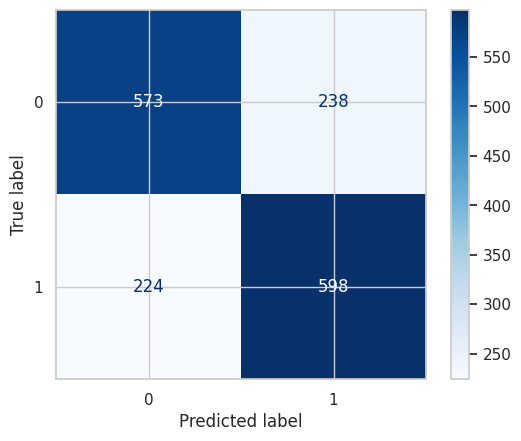

In [105]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test)

#the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.show()


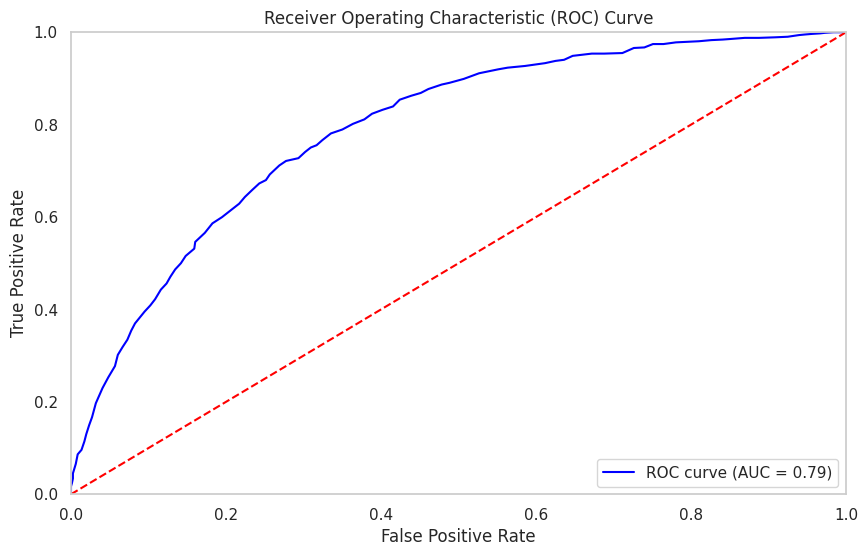

In [106]:
# Get the predicted probabilities for the positive class
y_probs_rf = rf_model.predict_proba(X_test)[:, 1]

# Compute the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_rf)

# Compute the AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()


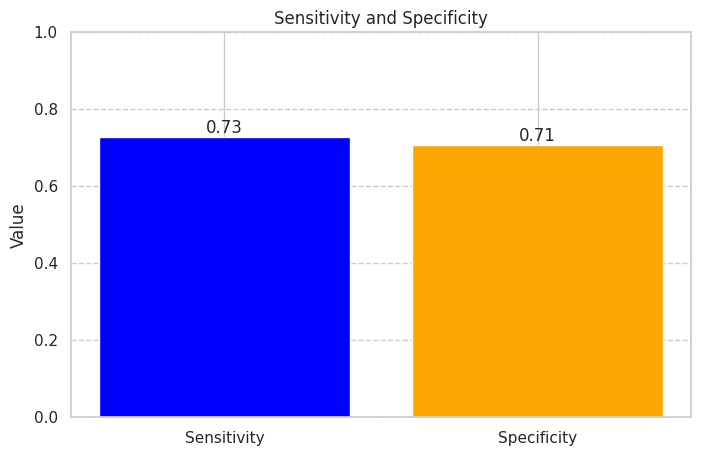

In [107]:
y_pred = rf_model.predict(X_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
# Sensitiviy (true positive rate)
sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0

# specificity (true negative rate)
specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

# Prepare data for plotting
metrics = ['Sensitivity', 'Specificity']
values = [sensitivity, specificity]

# Plotting
plt.figure(figsize=(8, 5))
bars = plt.bar(metrics, values, color=['blue', 'orange'])

# Add data labels on top of the bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, f'{yval:.2f}', ha='center', va='bottom')


plt.ylim(0, 1)
plt.ylabel('Value')
plt.title('Sensitivity and Specificity')
plt.grid(axis='y', linestyle='--')

# Show plot
plt.show()

# **DNN**

In [146]:
# Standardize the features (mean = 0, variance = 1)
scaler = StandardScaler()

# Fit the scaler on the training data and transform both the training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [147]:
# Defining the model
dnn_model = Sequential()

dnn_model.add(Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)))

dnn_model.add(Dense(64, activation='relu'))
dnn_model.add(Dense(16, activation='relu'))

dnn_model.add(Dense(1, activation='sigmoid'))  # Output :binary classification

#Compiling the model
dnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['AUC'])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [149]:
# Training the model
history = dnn_model.fit(X_train_scaled, y_train,
                        validation_data=(X_test_scaled, y_test),
                        epochs=20, batch_size=32, verbose=2)


Epoch 1/20
205/205 - 2s - 10ms/step - AUC: 0.7707 - loss: 0.5764 - val_AUC: 0.7847 - val_loss: 0.5639
Epoch 2/20
205/205 - 1s - 5ms/step - AUC: 0.7951 - loss: 0.5500 - val_AUC: 0.7868 - val_loss: 0.5611
Epoch 3/20
205/205 - 1s - 3ms/step - AUC: 0.8002 - loss: 0.5443 - val_AUC: 0.7868 - val_loss: 0.5592
Epoch 4/20
205/205 - 1s - 3ms/step - AUC: 0.8031 - loss: 0.5410 - val_AUC: 0.7867 - val_loss: 0.5604
Epoch 5/20
205/205 - 0s - 2ms/step - AUC: 0.8044 - loss: 0.5395 - val_AUC: 0.7861 - val_loss: 0.5603
Epoch 6/20
205/205 - 0s - 2ms/step - AUC: 0.8070 - loss: 0.5367 - val_AUC: 0.7858 - val_loss: 0.5613
Epoch 7/20
205/205 - 1s - 4ms/step - AUC: 0.8111 - loss: 0.5318 - val_AUC: 0.7842 - val_loss: 0.5683
Epoch 8/20
205/205 - 1s - 3ms/step - AUC: 0.8114 - loss: 0.5310 - val_AUC: 0.7859 - val_loss: 0.5630
Epoch 9/20
205/205 - 1s - 3ms/step - AUC: 0.8151 - loss: 0.5269 - val_AUC: 0.7887 - val_loss: 0.5588
Epoch 10/20
205/205 - 1s - 5ms/step - AUC: 0.8173 - loss: 0.5241 - val_AUC: 0.7805 - val_l

In [150]:
# Predict probabilities for the test set
y_probs_dnn = dnn_model.predict(X_test_scaled)

# Calculate AUC-ROC score
auc_dnn = roc_auc_score(y_test, y_probs_dnn)
print(f'DNN AUC-ROC: {auc_dnn:.4f}')


52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
DNN AUC-ROC: 0.7759


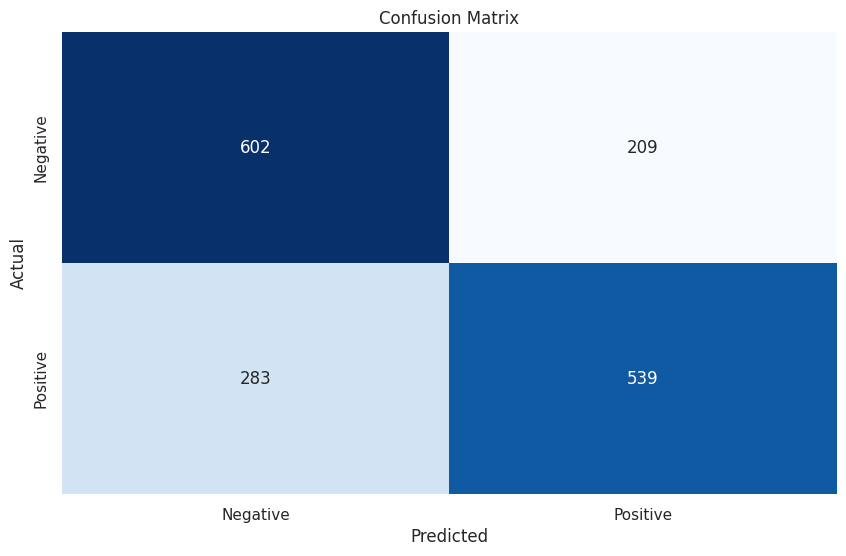

In [151]:
# Predict classes based on the predicted probabilities
y_pred_dnn = (y_probs_dnn > 0.5).astype(int)

# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_dnn)

plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()


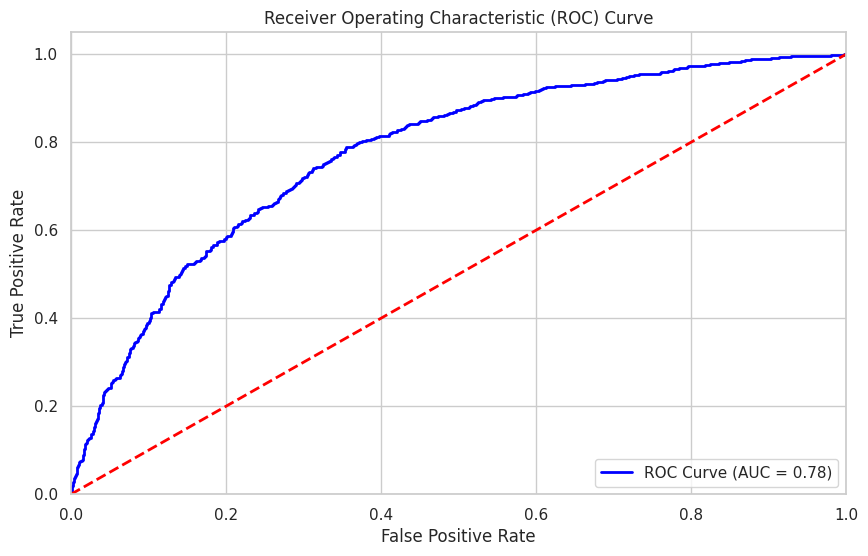

In [152]:
# ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs_dnn)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')  # Diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


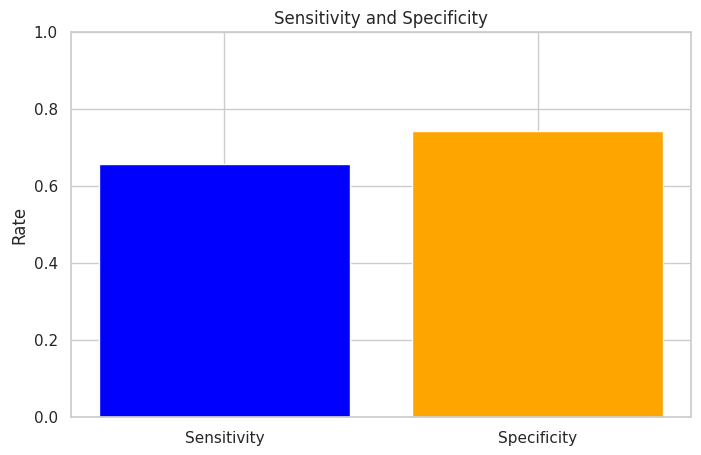

In [153]:
# sensitivity and specificity
tn, fp, fn, tp = conf_matrix.ravel()
sensitivity = tp / (tp + fn)  # True Positive Rate
specificity = tn / (tn + fp)  # True Negative Rate

# Plot sensitivity and specificity
plt.figure(figsize=(8, 5))
labels = ['Sensitivity', 'Specificity']
values = [sensitivity, specificity]

plt.bar(labels, values, color=['blue', 'orange'])
plt.ylim(0, 1)
plt.ylabel('Rate')
plt.title('Sensitivity and Specificity')
plt.show()


# **PAPERNOT ATTACKS**

Some important notes from the [paper](chrome-extension://efaidnbmnnnibpcajpcglclefindmkaj/https://arxiv.org/pdf/1807.01069).


* Defends Machine Learning models against adversarial threats.

* Helps making AI systems more secure and trustworthy.

* Adversarial examples can be (images, texts, tabular data, etc.) deliberately modified to produce a desired response by the Machine Learning model.

* Defending Machine Learning models involves and model hardening with approaches such as pre-processing inputs, **augmenting training data** with adversarial samples, and leveraging runtime detection methods to flag any inputs that might have been modified by an adversary.

* The attacks implemented in ART allow creating adversarial attacks against Machine Learning models which is required to test defenses with state-of-the-art threat models.


 How to find an adversarial sample:

**1. Search for leaves with different classes in the neighborhood of the leaf corresponding to the decision tree’s original prediction for the sample.**

**2. We then find the path from the original leaf to the adversarial leaf and modify the sample accordingly to the conditions on this path so as to force the decision tree to misclassify the sample in the adversarial class specified by the newly identified leaf.**

## **RandomForest Approach**

In [115]:
pip install adversarial-robustness-toolbox scikit-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 16.1 MB/s eta 0:00:00


In [155]:
# Wrap the optimized RandomForestClassifier model
art_classifier = SklearnClassifier(model=rf_optimized)

In [117]:
if isinstance(X_test, pd.DataFrame):
    X_test_np = X_test.to_numpy()

In [120]:
import pandas as pd
from art.estimators.classification import SklearnClassifier
from art.attacks.evasion import DecisionTreeAttack

# Prepare to collect all adversarial examples
all_adversarial_examples = []

# Iterate over trees in the Random Forest
for i, tree in enumerate(rf_optimized.estimators_):
    print(f"Attacking tree {i+1}")

    # Wrap the individual tree using SklearnClassifier
    tree_classifier = SklearnClassifier(model=tree)

    # Initialize DecisionTreeAttack for each tree
    attack = DecisionTreeAttack(classifier=tree_classifier, offset=0.001, verbose=True)

    # Generate adversarial examples
    try:
        rf_adversarial_examples = attack.generate(x=X_test_np)
        all_adversarial_examples.append(rf_adversarial_examples)  # Collect the examples
        print(f"Generated adversarial examples for tree {i+1}")
    except KeyError as e:
        print(f"KeyError encountered for tree {i+1}: {e}")


rf_adversarial_df = pd.DataFrame(np.vstack(all_adversarial_examples)[:100], columns=X_test.columns)


# Save the adversarial examples to a CSV file
rf_adversarial_df.to_csv('rf_adversarial_samples.csv', index=False)
print("Adversarial samples saved to 'rf_adversarial_samples.csv'")


Attacking tree 1


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 1
Attacking tree 2


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 2
Attacking tree 3


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 3
Attacking tree 4


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 4
Attacking tree 5


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 5
Attacking tree 6


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 6
Attacking tree 7


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 7
Attacking tree 8


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 8
Attacking tree 9


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 9
Attacking tree 10


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 10
Attacking tree 11


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 11
Attacking tree 12


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 12
Attacking tree 13


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 13
Attacking tree 14


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 14
Attacking tree 15


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 15
Attacking tree 16


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 16
Attacking tree 17


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 17
Attacking tree 18


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 18
Attacking tree 19


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 19
Attacking tree 20


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 20
Attacking tree 21


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 21
Attacking tree 22


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 22
Attacking tree 23


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 23
Attacking tree 24


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 24
Attacking tree 25


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 25
Attacking tree 26


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 26
Attacking tree 27


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 27
Attacking tree 28


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 28
Attacking tree 29


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 29
Attacking tree 30


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 30
Attacking tree 31


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 31
Attacking tree 32


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 32
Attacking tree 33


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 33
Attacking tree 34


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 34
Attacking tree 35


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 35
Attacking tree 36


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 36
Attacking tree 37


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 37
Attacking tree 38


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 38
Attacking tree 39


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 39
Attacking tree 40


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 40
Attacking tree 41


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 41
Attacking tree 42


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 42
Attacking tree 43


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 43
Attacking tree 44


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 44
Attacking tree 45


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 45
Attacking tree 46


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 46
Attacking tree 47


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 47
Attacking tree 48


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 48
Attacking tree 49


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 49
Attacking tree 50


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 50
Attacking tree 51


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 51
Attacking tree 52


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 52
Attacking tree 53


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 53
Attacking tree 54


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 54
Attacking tree 55


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 55
Attacking tree 56


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 56
Attacking tree 57


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 57
Attacking tree 58


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 58
Attacking tree 59


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 59
Attacking tree 60


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 60
Attacking tree 61


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 61
Attacking tree 62


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 62
Attacking tree 63


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 63
Attacking tree 64


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 64
Attacking tree 65


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 65
Attacking tree 66


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 66
Attacking tree 67


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 67
Attacking tree 68


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 68
Attacking tree 69


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 69
Attacking tree 70


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 70
Attacking tree 71


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 71
Attacking tree 72


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 72
Attacking tree 73


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 73
Attacking tree 74


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 74
Attacking tree 75


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 75
Attacking tree 76


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 76
Attacking tree 77


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 77
Attacking tree 78


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 78
Attacking tree 79


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 79
Attacking tree 80


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 80
Attacking tree 81


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 81
Attacking tree 82


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 82
Attacking tree 83


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 83
Attacking tree 84


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 84
Attacking tree 85


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 85
Attacking tree 86


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 86
Attacking tree 87


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 87
Attacking tree 88


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 88
Attacking tree 89


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 89
Attacking tree 90


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 90
Attacking tree 91


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 91
Attacking tree 92


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 92
Attacking tree 93


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 93
Attacking tree 94


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 94
Attacking tree 95


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 95
Attacking tree 96


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 96
Attacking tree 97


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 97
Attacking tree 98


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 98
Attacking tree 99


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 99
Attacking tree 100


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 100
Attacking tree 101


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 101
Attacking tree 102


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 102
Attacking tree 103


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 103
Attacking tree 104


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 104
Attacking tree 105


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 105
Attacking tree 106


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 106
Attacking tree 107


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 107
Attacking tree 108


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 108
Attacking tree 109


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 109
Attacking tree 110


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 110
Attacking tree 111


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 111
Attacking tree 112


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 112
Attacking tree 113


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 113
Attacking tree 114


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 114
Attacking tree 115


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 115
Attacking tree 116


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 116
Attacking tree 117


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 117
Attacking tree 118


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 118
Attacking tree 119


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 119
Attacking tree 120


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 120
Attacking tree 121


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 121
Attacking tree 122


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 122
Attacking tree 123


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 123
Attacking tree 124


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 124
Attacking tree 125


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 125
Attacking tree 126


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 126
Attacking tree 127


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 127
Attacking tree 128


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 128
Attacking tree 129


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 129
Attacking tree 130


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 130
Attacking tree 131


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 131
Attacking tree 132


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 132
Attacking tree 133


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 133
Attacking tree 134


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 134
Attacking tree 135


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 135
Attacking tree 136


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 136
Attacking tree 137


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 137
Attacking tree 138


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 138
Attacking tree 139


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 139
Attacking tree 140


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 140
Attacking tree 141


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 141
Attacking tree 142


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 142
Attacking tree 143


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 143
Attacking tree 144


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 144
Attacking tree 145


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 145
Attacking tree 146


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 146
Attacking tree 147


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 147
Attacking tree 148


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 148
Attacking tree 149


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 149
Attacking tree 150


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 150
Attacking tree 151


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 151
Attacking tree 152


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 152
Attacking tree 153


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 153
Attacking tree 154


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 154
Attacking tree 155


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 155
Attacking tree 156


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 156
Attacking tree 157


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 157
Attacking tree 158


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 158
Attacking tree 159


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 159
Attacking tree 160


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 160
Attacking tree 161


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 161
Attacking tree 162


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 162
Attacking tree 163


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 163
Attacking tree 164


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 164
Attacking tree 165


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 165
Attacking tree 166


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 166
Attacking tree 167


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 167
Attacking tree 168


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 168
Attacking tree 169


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 169
Attacking tree 170


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 170
Attacking tree 171


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 171
Attacking tree 172


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 172
Attacking tree 173


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 173
Attacking tree 174


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 174
Attacking tree 175


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 175
Attacking tree 176


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 176
Attacking tree 177


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 177
Attacking tree 178


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 178
Attacking tree 179


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 179
Attacking tree 180


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 180
Attacking tree 181


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 181
Attacking tree 182


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 182
Attacking tree 183


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 183
Attacking tree 184


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 184
Attacking tree 185


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 185
Attacking tree 186


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 186
Attacking tree 187


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 187
Attacking tree 188


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 188
Attacking tree 189


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 189
Attacking tree 190


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 190
Attacking tree 191


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 191
Attacking tree 192


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 192
Attacking tree 193


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 193
Attacking tree 194


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 194
Attacking tree 195


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 195
Attacking tree 196


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 196
Attacking tree 197


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 197
Attacking tree 198


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 198
Attacking tree 199


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 199
Attacking tree 200


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 200
Attacking tree 201


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 201
Attacking tree 202


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 202
Attacking tree 203


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 203
Attacking tree 204


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 204
Attacking tree 205


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 205
Attacking tree 206


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 206
Attacking tree 207


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 207
Attacking tree 208


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 208
Attacking tree 209


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 209
Attacking tree 210


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 210
Attacking tree 211


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 211
Attacking tree 212


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 212
Attacking tree 213


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 213
Attacking tree 214


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 214
Attacking tree 215


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 215
Attacking tree 216


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 216
Attacking tree 217


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 217
Attacking tree 218


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 218
Attacking tree 219


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 219
Attacking tree 220


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 220
Attacking tree 221


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 221
Attacking tree 222


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 222
Attacking tree 223


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 223
Attacking tree 224


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 224
Attacking tree 225


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 225
Attacking tree 226


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 226
Attacking tree 227


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 227
Attacking tree 228


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 228
Attacking tree 229


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 229
Attacking tree 230


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 230
Attacking tree 231


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 231
Attacking tree 232


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 232
Attacking tree 233


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 233
Attacking tree 234


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 234
Attacking tree 235


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 235
Attacking tree 236


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 236
Attacking tree 237


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 237
Attacking tree 238


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 238
Attacking tree 239


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 239
Attacking tree 240


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 240
Attacking tree 241


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 241
Attacking tree 242


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 242
Attacking tree 243


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 243
Attacking tree 244


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 244
Attacking tree 245


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 245
Attacking tree 246


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 246
Attacking tree 247


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 247
Attacking tree 248


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 248
Attacking tree 249


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 249
Attacking tree 250


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 250
Attacking tree 251


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 251
Attacking tree 252


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 252
Attacking tree 253


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 253
Attacking tree 254


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 254
Attacking tree 255


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 255
Attacking tree 256


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 256
Attacking tree 257


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 257
Attacking tree 258


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 258
Attacking tree 259


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 259
Attacking tree 260


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 260
Attacking tree 261


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 261
Attacking tree 262


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 262
Attacking tree 263


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 263
Attacking tree 264


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 264
Attacking tree 265


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 265
Attacking tree 266


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 266
Attacking tree 267


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 267
Attacking tree 268


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 268
Attacking tree 269


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 269
Attacking tree 270


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 270
Attacking tree 271


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 271
Attacking tree 272


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 272
Attacking tree 273


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 273
Attacking tree 274


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 274
Attacking tree 275


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 275
Attacking tree 276


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 276
Attacking tree 277


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 277
Attacking tree 278


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 278
Attacking tree 279


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 279
Attacking tree 280


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 280
Attacking tree 281


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 281
Attacking tree 282


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 282
Attacking tree 283


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 283
Attacking tree 284


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 284
Attacking tree 285


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 285
Attacking tree 286


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 286
Attacking tree 287


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 287
Attacking tree 288


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 288
Attacking tree 289


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 289
Attacking tree 290


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 290
Attacking tree 291


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 291
Attacking tree 292


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 292
Attacking tree 293


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 293
Attacking tree 294


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 294
Attacking tree 295


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 295
Attacking tree 296


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 296
Attacking tree 297


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 297
Attacking tree 298


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 298
Attacking tree 299


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 299
Attacking tree 300


Decision tree attack:   0%|          | 0/1633 [00:00<?, ?it/s]

Generated adversarial examples for tree 300
Adversarial samples saved to 'rf_adversarial_samples.csv'


In [121]:
rf_adversarial_df = pd.read_csv('rf_adversarial_samples.csv')

In [122]:
rf_adversarial_df.head()

ExternalRiskEstimate  NumTradesOpeninLast12M  MaxDelq2PublicRecLast12M  \
0              0.640777                0.357143                  0.722222   
1              0.776699                0.464286                  0.833333   
2              0.718447                0.392857                  0.610111   
3              0.689320                0.321429                  0.610111   
4              0.770845                0.321429                  0.888889   

   NumTrades90Ever2DerogPubRec  NumTrades60Ever2DerogPubRec  AverageMInFile  \
0                     0.321429                     0.321429        0.187776   
1                     0.357143                     0.338286        0.346939   
2                     0.357143                     0.357143        0.150510   
3                     0.357143                     0.357143        0.210735   
4                     0.321429                     0.321429        0.270408   

   MSinceMostRecentInqexcl7days  NumTotalTrades  MSinceMostRecentDelq  \
0                      0.272727        0.315159              0.108696   
1                      0.272727        0.145018              0.265304   
2                      0.333333        0.345133              0.260870   
3                      0.060606        0.115044              0.108696   
4                      0.272727        0.118469              0.021739   

   PercentTradesNeverDelq  NumInqLast6Mexcl7days  NumInqLast6M  \
0                0.893495               0.160000      0.160000   
1                0.963303               0.120000      0.120000   
2                0.935780               0.133333      0.133333   
3                0.871560               0.120000      0.120000   
4                1.000000               0.120000      0.120000   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                    0.244813                  0.216667   
1                    0.183647                  0.171917   
2                    0.185647                  0.212500   
3                    0.185647                  0.068750   
4                    0.219917                  0.002083   

   NumRevolvingTradesWBalance  
0                    0.390244  
1                    0.341463  
2                    0.268293  
3                    0.365854  
4                    0.341463

In [123]:

rf_adversarial_df = pd.read_csv('rf_adversarial_samples.csv')

# Assuming y_test is the true labels for our original test set
# Making predictions using the optimized Random Forest model
rf_adversarial_predictions = rf_optimized.predict(rf_adversarial_df)

# Calculate accuracy
accuracy = (rf_adversarial_predictions == y_test[:100]).mean()
print(f'Accuracy on random forest adversarial examples: {accuracy:.4f}')


Accuracy on adversarial examples: 0.7500


## **DNN Approach**

In [124]:
# Function to create adversarial examples using Fast Gradient Sign Method from :https://arxiv.org/pdf/1412.6572
def generate_dnn_adversarial_examples(model, x, y, epsilon):
    x = tf.convert_to_tensor(x)  # Convert input to tensor

    with tf.GradientTape() as tape:
        tape.watch(x)
        prediction = model(x)  # Model prediction
        loss = tf.keras.losses.binary_crossentropy(y, prediction)  # Calculate loss

    gradient = tape.gradient(loss, x)
    signed_grad = tf.sign(gradient)
    adversarial = x + epsilon * signed_grad  # creating adversarial examples

    return tf.clip_by_value(adversarial, 0, 1)  # Clip values to valid range




epsilon = 0.1  # Perturbation amount

#generate adversarial examples
dnn_adversarial_examples = generate_dnn_adversarial_examples(
    dnn_model,
    X_test_scaled[:100],
    y_test[:100].to_numpy().reshape(-1, 1),
    epsilon
)

# Convert the adversarial examples to a DataFrame
dnn_adversarial_examples_np = dnn_adversarial_examples.numpy()

dnn_adversarial_df = pd.DataFrame(dnn_adversarial_examples_np, columns=X_test.columns[:100])
dnn_adversarial_df.to_csv('dnn_adversarial_examples.csv', index=False)

# Confirm that the file was saved
print("Adversarial examples saved to 'dnn_adversarial_examples.csv'")


Adversarial examples saved to 'dnn_adversarial_examples.csv'


In [125]:
dnn_adversarial_df.head()

ExternalRiskEstimate  NumTradesOpeninLast12M  MaxDelq2PublicRecLast12M  \
0              0.000000                0.000000                  0.000000   
1              0.000000                1.000000                  0.000000   
2              0.000000                0.015263                  0.000000   
3              0.000000                0.000000                  0.000000   
4              0.518817                0.000000                  0.711062   

   NumTrades90Ever2DerogPubRec  NumTrades60Ever2DerogPubRec  AverageMInFile  \
0                          0.0                     0.000000        0.000000   
1                          1.0                     0.873358        1.000000   
2                          1.0                     0.673358        0.000000   
3                          1.0                     0.673358        0.787029   
4                          0.0                     0.000000        0.727605   

   MSinceMostRecentInqexcl7days  NumTotalTrades  MSinceMostRecentDelq  \
0                      0.132934        0.155521              0.000000   
1                      0.000000        0.125986              0.466144   
2                      0.521423        0.552149              0.560039   
3                      0.000000        0.000000              0.000000   
4                      0.132934        0.000000              0.000000   

   PercentTradesNeverDelq  NumInqLast6Mexcl7days  NumInqLast6M  \
0                0.000000                    1.0           1.0   
1                0.149931                    0.0           0.0   
2                0.011944                    0.0           0.0   
3                0.000000                    0.0           0.0   
4                0.600580                    0.0           0.0   

   NetFractionRevolvingBurden  NetFractionInstallBurden  \
0                    0.460832                       1.0   
1                    0.206201                       1.0   
2                    0.000000                       1.0   
3                    0.000000                       0.0   
4                    0.451002                       0.0   

   NumRevolvingTradesWBalance  
0                    1.000000  
1                    0.515282  
2                    0.000000  
3                    0.700858  
4                    0.515282

In [158]:
dnn_adversarial_predictions = rf_optimized.predict(dnn_adversarial_df)

# Calculate accuracy
accuracy = (dnn_adversarial_predictions == y_test[:100]).mean()
print(f'Accuracy on adversarial examples: {accuracy:.4f}')


Accuracy on adversarial examples: 0.5000


## **synthesis**


let's analyze now the results from both approaches used to generate adversarial examples.
1- Random forest approach:
we implemented the Papernot’s attack on each decision trees of the RandomForest (300 trees) following Algorithm 2 from : https://arxiv.org/pdf/1605.07277 in order to generate 100 adversarial examples from the test set(rf_adv_examples).
When we tested the **RandomForest** with the following parameters() on rf_adv_examples we got the following results:
Accuracy on random forest adversarial examples: 0.7500
As you can see, the accuracy is quite high, compared to our expectations. This means that the generated adversarial examples are not of high quality and therefore not so different from the legit examples.
This also gives us insights about how challenging the generation process is in a RandomForest due to its complicated architecture which contains 300 decision trees. For intance, if we manage to generate 1 adversarial example x* that fools a single decision tree, how can this same x* fool the 299 other trees ?

2-DNN approach
In order to adress the previous limitation and reduce the dependency on the tree architecture, we thought of leveraging deep features to extracte better patterns from the data.
For this, we implemented the Fast Gradient sign Method on the dnn classifier and generated 100 adversarial examples(dnn_adv_examples) from the same test set used previously.
Following are the results after testing the **RandomForest** on dnn_adv_examples:
Accuracy on dnn adversarial examples: 0.5000
we notice an interesting decrease of 0,25 in the accuracy which is translated by the improved quality of the generated examples when we leveraged deep features for adversarial samples generation.

The deep neural network architecture is more efficient in adversarial examples generation compared to the random forest complicated architecture.


# **References**

https://arxiv.org/abs/1605.07277

https://arxiv.org/abs/1412.6572

https://github.com/Trusted-AI/adversarial-robustness-toolbox

https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#decision-tree-attack

https://www.tensorflow.org/tutorials/generative/adversarial_fgsm
